<a href="https://colab.research.google.com/github/riyadodthi/MSc-Project-LAPA/blob/main/3_MSc_Project_TempVsRSQuality_V1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


import warnings
warnings.filterwarnings("ignore")

In [32]:
# Load Data -  Weather and air quality for each day
weather_df = pd.read_csv("/content/drive/MyDrive/Exam/london_weather.csv")
quality_df = pd.read_csv("/content/drive/MyDrive/Exam/air-quality-london-time-of-day.csv")

#display(weather_df)
#quality_df.head(2)


In [33]:
# Data Cleaning
# Quality
df_qdate = quality_df.drop(columns='GMT') # drop time
df_qdate.fillna(0,inplace=True)  # fill NA
df_qdate['Month']=pd.to_datetime(df_qdate['Month'],yearfirst=True) # convert month col to date format

# Weather
df_w = weather_df
df_w.fillna(0,inplace=True)
#df_qdate

In [34]:
# Mean quality for each month
df_qdate_gr = df_qdate.set_index('Month')
df_qdate_gr = df_qdate_gr.groupby(pd.Grouper(freq='D'))
df_qdate_mean = df_qdate_gr.mean()

df_qdate_mean.dropna(inplace=True)
#df_qdate_mean

In [35]:
# Fix date format issue (from yyyy-dd-mm to yyyy-mm-dd)
date_month = pd.date_range(start='2008-01-01', end='2019-07-01', freq='MS') # genrate new date col for each month
df_qdate_mean['date'] = date_month
df_qdate_mean.set_index('date',inplace=True)
#df_qdate_mean

In [36]:
# Fix date format issue
date_range = pd.date_range(start='1979-01-01', end='2020-12-31', freq='D')
weather_df['date2'] = date_range

weather_df_new = weather_df.drop(columns='date')

# mean of weather
weather_df_new.set_index('date2',inplace=True)
df_wdate_gr = weather_df_new.groupby(pd.Grouper(freq='M'))
df_wdate_mean = df_wdate_gr.mean()

date_range_month = pd.date_range(start='1979-01-01', end='2020-12-01', freq='MS')
print(date_range_month.size)
df_wdate_mean['date'] = date_range_month
df_wdate_mean.set_index('date',inplace=True)


#display(df_wdate_mean)



504


In [37]:
# merge both ds based on date
df_merge = pd.merge(df_qdate_mean, df_wdate_mean, left_index=True, right_index=True)
df_merge.reset_index(inplace=True)

# Add columns for total roadside pollution and background pollution

df_merge['Total Roadside'] = df_merge.iloc[:,1:8].sum(axis=1)
df_merge['Total Background'] = df_merge.iloc[:,8:14].sum(axis=1)
df_merge.head(5)

,date,London Mean Roadside:Nitric Oxide (ug/m3),London Mean Roadside:Nitrogen Dioxide (ug/m3),London Mean Roadside:Oxides of Nitrogen (ug/m3),London Mean Roadside:Ozone (ug/m3),London Mean Roadside:PM10 Particulate (ug/m3),London Mean Roadside:PM2.5 Particulate (ug/m3),London Mean Roadside:Sulphur Dioxide (ug/m3),London Mean Background:Nitric Oxide (ug/m3),London Mean Background:Nitrogen Dioxide (ug/m3),...,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Total Roadside,Total Background
0,2008-01-01,0.0,55.512500,0.0,29.512500,24.970833,14.675000,4.216667,0.0,42.345833,...,1.941935,30.419355,10.412903,7.390323,4.709677,2.225806,101234.516129,0.000000,128.887500,101.679167
1,2008-02-01,0.0,75.925000,0.0,20.316667,39.487500,28.775000,7.554167,0.0,60.241667,...,4.482759,67.137931,10.989655,6.500000,2.031034,0.531034,102306.551724,0.000000,172.058333,125.275000
2,2008-03-01,0.0,55.600000,0.0,40.112500,21.570833,12.308333,3.870833,0.0,39.800000,...,2.764516,91.225806,10.587097,6.845161,3.719355,2.251613,100653.870968,0.000000,133.462500,107.783333
3,2008-04-01,0.0,61.758333,0.0,37.879167,28.750000,20.454167,4.475000,0.0,44.004167,...,4.676667,151.800000,13.660000,9.056667,5.190000,2.113333,101034.333333,0.133333,153.316667,119.104167
4,2008-05-01,0.0,62.912500,0.0,46.270833,34.620833,27.500000,4.629167,0.0,44.133333,...,5.245161,182.225806,19.751613,14.641935,10.454839,2.070968,101490.322581,0.000000,175.933333,138.445833


In [38]:
df_roadside = df_merge.iloc[:,14:24]
df_bckgrnd = df_merge.iloc[:,14:23]
df_bckgrnd['Total Background'] = df_merge.iloc[:,24]
#df_roadside['Total roadside'] = df_merge.iloc[:,23]
df_roadside

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Total Roadside
0,5.419355,1.941935,30.419355,10.412903,7.390323,4.709677,2.225806,101234.516129,0.000000,128.887500
1,3.724138,4.482759,67.137931,10.989655,6.500000,2.031034,0.531034,102306.551724,0.000000,172.058333
2,5.645161,2.764516,91.225806,10.587097,6.845161,3.719355,2.251613,100653.870968,0.000000,133.462500
3,4.700000,4.676667,151.800000,13.660000,9.056667,5.190000,2.113333,101034.333333,0.133333,153.316667
4,4.677419,5.245161,182.225806,19.751613,14.641935,10.454839,2.070968,101490.322581,0.000000,175.933333
...,...,...,...,...,...,...,...,...,...,...
134,5.548387,3.838710,103.806452,13.229032,9.483871,5.845161,1.600000,101650.645161,0.000000,235.562500
135,4.600000,5.670000,163.800000,15.923333,10.736667,5.700000,0.426667,101407.666667,0.000000,261.975000
136,5.032258,5.687097,194.161290,18.838710,13.448387,8.361290,1.161290,101714.838710,0.000000,219.187500
137,5.433333,5.670000,166.266667,21.670000,16.893333,11.923333,2.726667,101446.333333,0.000000,188.487500


Find the highest corr value after 1:
 cloud_cover       sunshine           -0.723888
sunshine          cloud_cover        -0.723888
cloud_cover       global_radiation   -0.535424
global_radiation  cloud_cover        -0.535424
precipitation     pressure           -0.493473
                                        ...   
sunshine          global_radiation    0.929564
global_radiation  sunshine            0.929564
max_temp          min_temp            0.969485
min_temp          max_temp            0.969485
                  mean_temp           0.990601
Length: 87, dtype: float64


<Axes: >

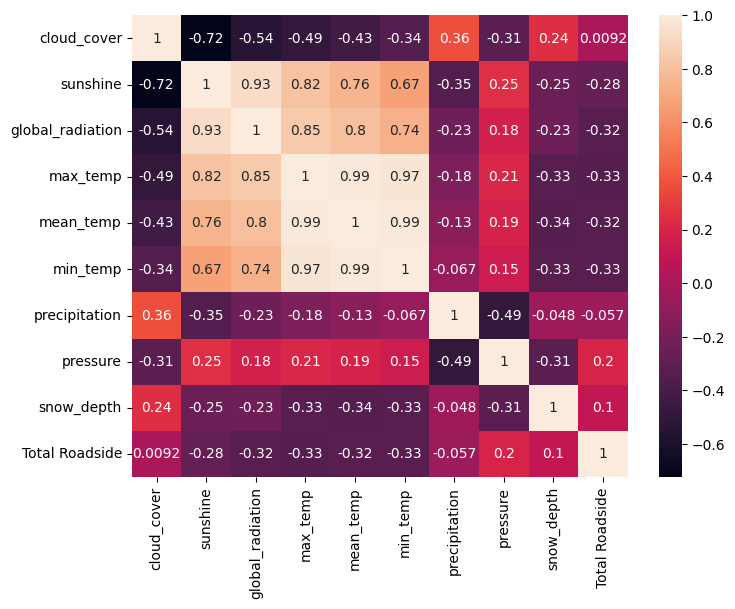

In [39]:
#Correlation between features

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

#feature_df = pd.DataFrame(np.column_stack((X,y)))
feature_df = pd.merge(df_roadside.iloc[:,0:9], df_roadside.iloc[:,9], left_index=True, right_index=True)
#display(feature_df)

corr = feature_df.corr()
#display(corr)

sorted_mat = corr.unstack().sort_values() # Sort corr values
print("Find the highest corr value after 1:\n",sorted_mat[:-13])
sns.heatmap(corr, annot=True,ax=ax)

In [40]:
'''
# drop unneccessary cols for bckgrnd ds
drop_col = ['cloud_cover','sunshine','max_temp','mean_temp','precipitation', 'pressure','snow_depth']
#drop_col = ['precipitation', 'cloud_cover']
df_bckgrnd = df_bckgrnd.drop(columns=drop_col)
'''

"\n# drop unneccessary cols for bckgrnd ds\ndrop_col = ['cloud_cover','sunshine','max_temp','mean_temp','precipitation', 'pressure','snow_depth']\n#drop_col = ['precipitation', 'cloud_cover']\ndf_bckgrnd = df_bckgrnd.drop(columns=drop_col)\n"

In [41]:
df_roadside= df_roadside.round(1)
df_roadside_test = df_roadside
'''
sc = StandardScaler()
df_bckgrnd_norm_test = pd.DataFrame(sc.fit_transform(df_bckgrnd))
df_bckgrnd_norm = pd.DataFrame(sc.fit_transform(df_bckgrnd))
'''

'\nsc = StandardScaler()\ndf_bckgrnd_norm_test = pd.DataFrame(sc.fit_transform(df_bckgrnd))\ndf_bckgrnd_norm = pd.DataFrame(sc.fit_transform(df_bckgrnd))\n'

In [42]:
print(df_roadside.iloc[:,0].min(),df_roadside.iloc[:,0].max())
print(df_roadside.iloc[:,5].min(),df_roadside.iloc[:,5].max())


2.1 6.6
-1.5 16.4


In [43]:
#df_bckgrnd_norm_intr = df_bckgrnd_norm
from scipy.stats import rayleigh

random_values = rayleigh.rvs(loc=-0.094, scale=1.43, size=500, random_state=None)

for value in random_values:
    df_roadside = pd.concat([df_roadside, pd.DataFrame({'precipitation': [value]})], ignore_index=True)
df_roadside

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Total Roadside
0,5.4,1.9,30.4,10.4,7.4,4.7,2.200000,101234.5,0.0,128.9
1,3.7,4.5,67.1,11.0,6.5,2.0,0.500000,102306.6,0.0,172.1
2,5.6,2.8,91.2,10.6,6.8,3.7,2.300000,100653.9,0.0,133.5
3,4.7,4.7,151.8,13.7,9.1,5.2,2.100000,101034.3,0.1,153.3
4,4.7,5.2,182.2,19.8,14.6,10.5,2.100000,101490.3,0.0,175.9
...,...,...,...,...,...,...,...,...,...,...
634,NaN,NaN,NaN,NaN,NaN,NaN,0.467021,NaN,NaN,NaN
635,NaN,NaN,NaN,NaN,NaN,NaN,0.976384,NaN,NaN,NaN
636,NaN,NaN,NaN,NaN,NaN,NaN,1.315394,NaN,NaN,NaN
637,NaN,NaN,NaN,NaN,NaN,NaN,0.016367,NaN,NaN,NaN


In [44]:
# Create new data - Interpolation
df_roadside = df_roadside.interpolate()
df_roadside

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Total Roadside
0,5.4,1.9,30.4,10.4,7.4,4.7,2.200000,101234.5,0.0,128.9
1,3.7,4.5,67.1,11.0,6.5,2.0,0.500000,102306.6,0.0,172.1
2,5.6,2.8,91.2,10.6,6.8,3.7,2.300000,100653.9,0.0,133.5
3,4.7,4.7,151.8,13.7,9.1,5.2,2.100000,101034.3,0.1,153.3
4,4.7,5.2,182.2,19.8,14.6,10.5,2.100000,101490.3,0.0,175.9
...,...,...,...,...,...,...,...,...,...,...
634,4.8,6.3,191.3,25.6,20.2,14.9,0.467021,101598.4,0.0,193.2
635,4.8,6.3,191.3,25.6,20.2,14.9,0.976384,101598.4,0.0,193.2
636,4.8,6.3,191.3,25.6,20.2,14.9,1.315394,101598.4,0.0,193.2
637,4.8,6.3,191.3,25.6,20.2,14.9,0.016367,101598.4,0.0,193.2


In [45]:
#pip install fitter

In [46]:
'''
from scipy.stats import rayleigh

plt.hist(df_bckgrnd_test['precipitation'], bins=50,color="blue", alpha=0.5)

x = rayleigh.rvs(loc=-0.09368733918255762, scale=1.426002420282936, size=139, random_state=None)

plt.hist(x, bins=50,color='Green')
plt.show()
'''

'\nfrom scipy.stats import rayleigh\n\nplt.hist(df_bckgrnd_test[\'precipitation\'], bins=50,color="blue", alpha=0.5)\n\nx = rayleigh.rvs(loc=-0.09368733918255762, scale=1.426002420282936, size=139, random_state=None)\n\nplt.hist(x, bins=50,color=\'Green\')\nplt.show()\n'

In [47]:
'''
from fitter import Fitter

from scipy.stats import gamma

# Convert data to a list or numpy array
data_list = df_bckgrnd_test.iloc[:,6].tolist()

# Fit distributions and compare using fitter library
fitter = Fitter(data_list)
fitter.fit()

# Get the best-fitting distribution
best_dist = fitter.get_best()
#best_params = fitter.fitted_param[best_dist]

print(f"Best fit distribution: {best_dist}")
#print(f"Parameters: {best_params}")
fitter.summary()
'''

'\nfrom fitter import Fitter\n\nfrom scipy.stats import gamma\n\n# Convert data to a list or numpy array\ndata_list = df_bckgrnd_test.iloc[:,6].tolist()\n\n# Fit distributions and compare using fitter library\nfitter = Fitter(data_list)\nfitter.fit()\n\n# Get the best-fitting distribution\nbest_dist = fitter.get_best()\n#best_params = fitter.fitted_param[best_dist]\n\nprint(f"Best fit distribution: {best_dist}")\n#print(f"Parameters: {best_params}")\nfitter.summary()\n'

In [48]:
# Normalize
sc = StandardScaler()
df_roadside_norm_test = pd.DataFrame(sc.fit_transform(df_roadside))
df_roadside_norm = pd.DataFrame(sc.fit_transform(df_roadside))

In [49]:
# Split into training and testing
bckx_train, bckx_test, bcky_train, bcky_test = train_test_split(df_roadside_norm.iloc[:,0:9],df_roadside_norm.iloc[:,-1],test_size=0.35, random_state=19)
print(bckx_train.shape, bcky_train.shape, bckx_test.shape, bcky_test.shape)

(415, 9) (415,) (224, 9) (224,)


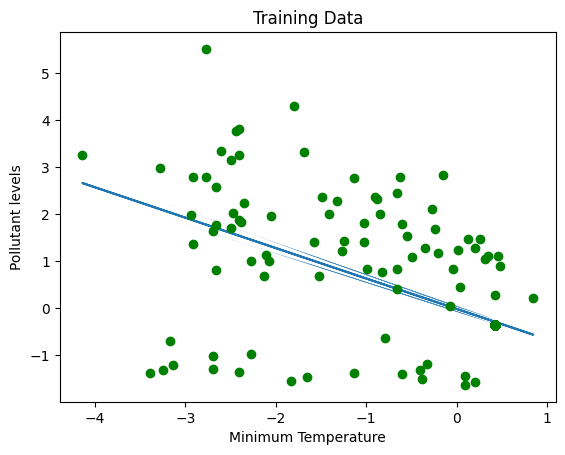

In [50]:

x = bckx_train.iloc[:,5]
y = bcky_train

#N = 21
#x = np.linspace(0, 10, 11)
#y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.8)
ax.set_xlabel("Minimum Temperature")
ax.set_ylabel("Pollutant levels")
ax.set_title("Training Data")
ax.plot(x, y, 'o', color='Green')

(415,) (415,)
(224,) (224,)


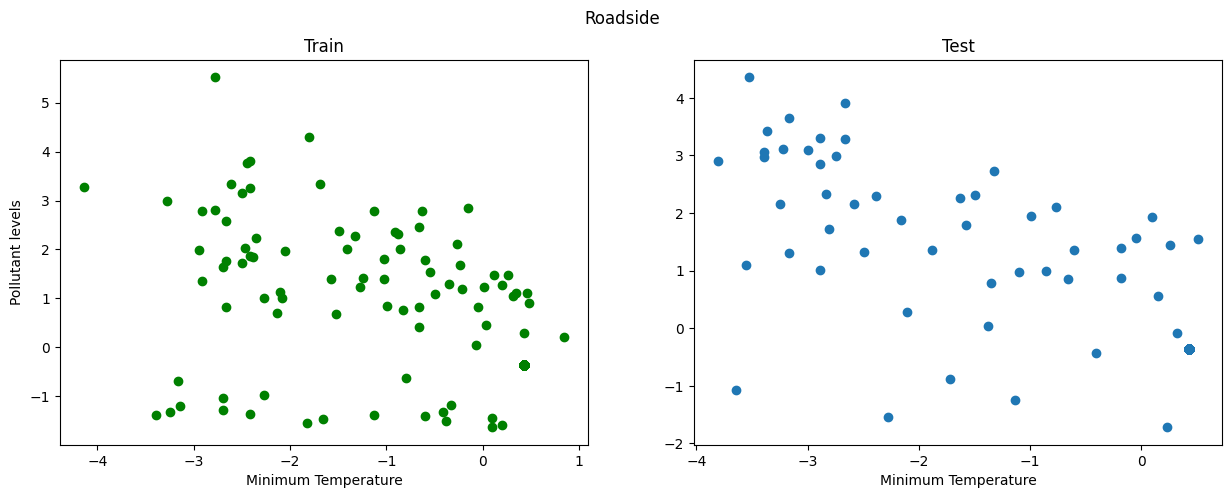

In [51]:
# Check distribution and relations
fig, ax = plt.subplots(1,2,figsize=(15,5))
plt.suptitle("Roadside")
ax[0].scatter(bckx_train.iloc[:,5],bcky_train,color="green")

ax[0].set_xlabel("Minimum Temperature")
ax[0].set_ylabel("Pollutant levels")
ax[0].set_title("Train")
#ax[0].scatter(df_bckgrnd_norm_test.iloc[0:448,5],df_bckgrnd_norm_test.iloc[0:448,9],alpha=0.5,color ="green")

ax[1].scatter(bckx_test.iloc[:,5],bcky_test)
ax[1].set_xlabel("Minimum Temperature")
#ax[1].set_ylabel("RS pollutant levels")
ax[1].set_title("Test")


print(bckx_train.iloc[:,6].shape,bcky_train.shape)
print(bckx_test.iloc[:,6].shape,bcky_test.shape)

plt.show()

In [52]:

# Regression model on training data to find outliers
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
poly = PolynomialFeatures(degree=5)
lss = Lasso()
en = ElasticNet()

param_en = {'alpha': [0.2, 0.1, 0.3], 'l1_ratio': [0.2, 0.5, 0.8],'fit_intercept':[True,False]}

param_lss = {'alpha': [0.2, 0.1, 0.3, 0.4]}
param_rfr = {'n_estimators': [100,120], 'random_state':[12]}
param_lr = {'fit_intercept':[True]}
param_dt = {'random_state':[0,4]}
param_svr = {
    'kernel' :['linear', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'scale'],
    'epsilon': [0.1, 0.2, 0.3]
}

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('en', ElasticNet())
])
param_m = {
    'poly__degree': [1, 2, 3],       # Polynomial degree
    'en__alpha': [0.2, 0.1, 0.3]   # ElasticNet regularization strength
}

model = GridSearchCV(estimator=pipeline, param_grid=param_m, cv=6)
model.fit(bckx_train,bcky_train)
best_alpha = model.best_params_
print("Best Alpha:", best_alpha)
best_elastic_net = model.best_estimator_

# Make predictions
predictions = best_elastic_net.predict(bckx_test)

# Evaluate the model
mse = mean_squared_error(bcky_test, predictions)
print("Mean Squared Error:", mse)

#model = make_pipeline(StandardScaler(),GridSearchCV(en,param_grid=param_en, cv=6))

#model.fit(bckx_train, bcky_train)
y_pred = model.predict(bckx_train)
print("Test Score: ",model.score(bckx_test,bcky_test))
print("Train Score: ",model.score(bckx_train,bcky_train))




Best Alpha: {'en__alpha': 0.1, 'poly__degree': 1}
Mean Squared Error: 0.38016420595901135
Test Score:  0.6684404659914323
Train Score:  0.46612075136409703


In [53]:
'''
plt.hist(res, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
'''

"\nplt.hist(res, bins=50)\nplt.xlabel('Residuals')\nplt.ylabel('Frequency')\nplt.title('Histogram of Residuals')\nplt.show()\n"

In [54]:
from scipy import stats
res = bcky_train - y_pred

z_scores = stats.zscore(res)

threshold =2

outlier_mask = np.abs(z_scores) > threshold


bck_train = pd.merge(bckx_train, bcky_train, left_index=True, right_index=True)
outlier_residuals = bcky_train[outlier_mask]
outlier_indices = bck_train.index[outlier_mask]
#outlier_indices = np.where(outlier_mask)[0]
print(outlier_residuals.shape)
#list(outlier_indices)


(33,)


In [55]:

bck_train = bck_train.drop(list(outlier_indices))
bck_train
#bx, by = bck_train.iloc[:,0:2], bck_train.iloc[:,2]
bx, by = bck_train.iloc[:,0:9], bck_train.iloc[:,-1]

In [56]:
bx.shape, by.shape

((382, 9), (382,))

In [57]:
bckx_test.shape,bcky_test.shape

((224, 9), (224,))

(415,) (415,)
(224,) (224,)


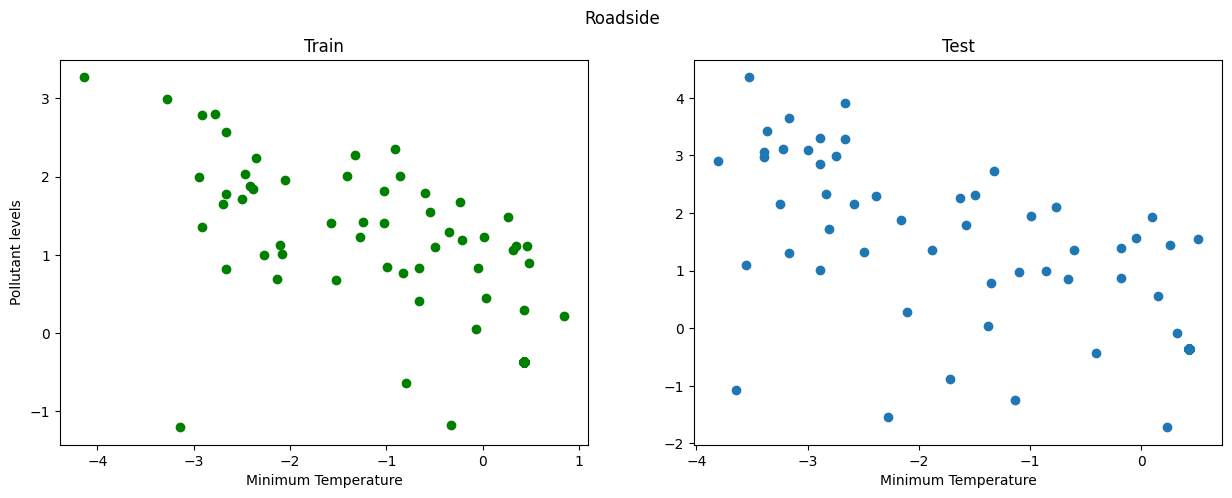

In [58]:
'''
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].scatter(bx.iloc[:,5],by)
ax[1].scatter(bckx_test.iloc[:,5],bcky_test)
#ax[2].hist()
print(bckx_test.iloc[:,5].shape)

plt.show()
'''
# Check distribution and relations
fig, ax = plt.subplots(1,2,figsize=(15,5))
plt.suptitle("Roadside")
ax[0].scatter(bx.iloc[:,5],by,color="green")

ax[0].set_xlabel("Minimum Temperature")
ax[0].set_ylabel("Pollutant levels")
ax[0].set_title("Train")
#ax[0].scatter(df_bckgrnd_norm_test.iloc[0:448,5],df_bckgrnd_norm_test.iloc[0:448,9],alpha=0.5,color ="green")

ax[1].scatter(bckx_test.iloc[:,5],bcky_test)
ax[1].set_xlabel("Minimum Temperature")
#ax[1].set_ylabel("RS pollutant levels")
ax[1].set_title("Test")


print(bckx_train.iloc[:,6].shape,bcky_train.shape)
print(bckx_test.iloc[:,6].shape,bcky_test.shape)

plt.show()

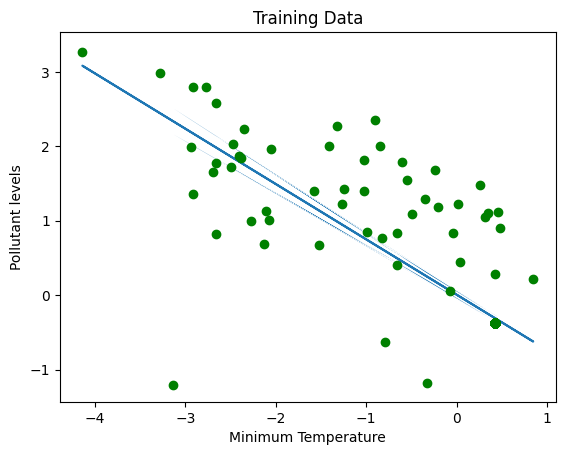

In [61]:

x = bx.iloc[:,5]
y = by

#N = 21
#x = np.linspace(0, 10, 11)
#y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=1)
ax.set_xlabel("Minimum Temperature")
ax.set_ylabel("Pollutant levels")
ax.set_title("Training Data")
ax.plot(x, y, 'o', color='Green')

In [60]:

model.fit(bx, by)
y_pred = model.predict(bckx_test)
mse2 = mean_squared_error(bcky_test, y_pred)
print("Mean Squared Error:", mse2)
print("Test Score: ",model.score(bckx_test,bcky_test))
print("Train Score: ",model.score(bx,by))

#19-0.35split -68%

Mean Squared Error: 0.3582333931931002
Test Score:  0.6875673852203263
Train Score:  0.7968943595914444
